### Multivariate Output Stacked LSTM using Iterative Prediction

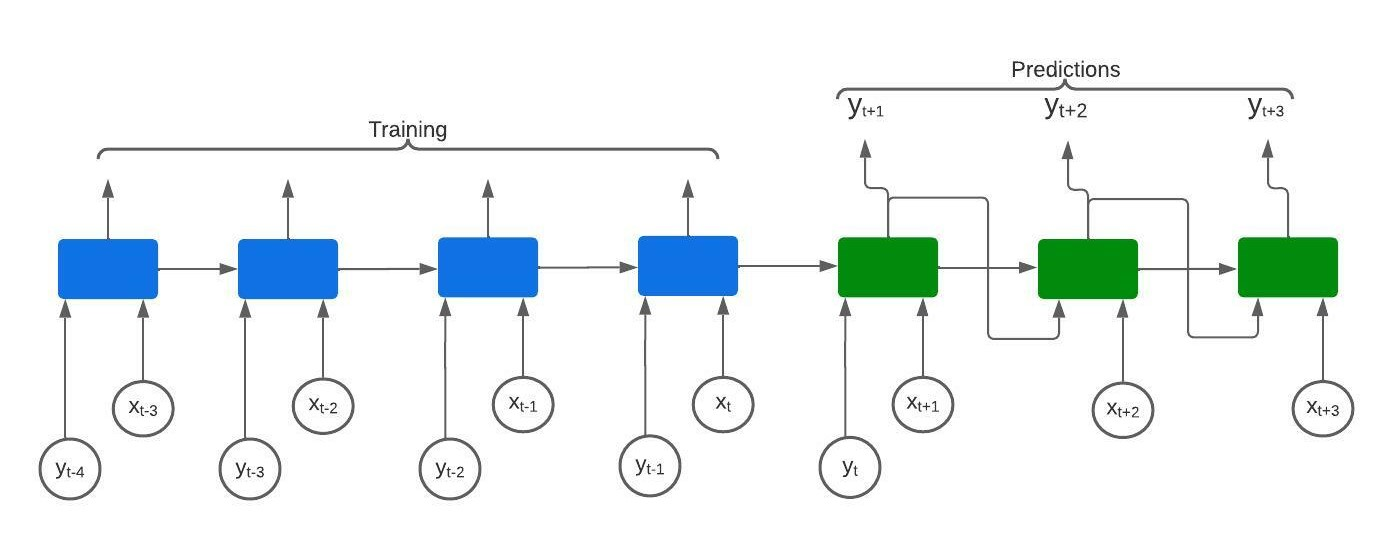

In [1]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack, vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence

# Read the data
data = read_csv('samples_data.csv', header=0, index_col=0)

# horizontally stack columns
raw_data = data.values
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data)

n_train = 2000
#dataset = raw_data[0:n_train,:]
dataset = scaled_data[0:n_train,:]
# choose a number of time steps
n_steps = 30
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.1))
model.add(LSTM(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)

# demonstrate iterative prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
x_inp = scaled_data[n_train:n_train+n_steps,:]
print(f'Initial shape of x_input {x_inp.shape}')
# x_inp = array([[70,75,145], [80,85,165], [90,95,185]])
result = []
var_1, var_2, var_3, var_4, var_5 = list(), list(), list(), list(), list()
# num_repeat = 30
num_repeat = 200
for i in range(num_repeat):
  x_input = x_inp.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  # inv_yhat = scaler.inverse_transform(yhat)
  var_1.append(yhat[0][0])
  var_2.append(yhat[0][1])
  var_3.append(yhat[0][2])
  var_4.append(yhat[0][3])
  var_5.append(yhat[0][4])
  # p = np.append(x_inp[0],yhat[0][0])[1:]
  # q = np.append(x_inp[1],yhat[0][1])[1:]
  # r = np.append(x_inp[2],yhat[0][2])[1:]
  print(f'Value of yhat {yhat}')
  result = np.append(result,yhat[0])
  x_inp = np.append(x_inp,yhat[0])
  x_inp = x_inp.reshape(1,n_steps+1,5)
  x_inp = x_inp[:,1:,0:]

var = DataFrame(vstack((var_1,var_2,var_3,var_4,var_5))).T
inv_var = scaler.inverse_transform(var)
print("--------------AFTER THE INVERTED SCALING-------------------")
inv_var



Initial shape of x_input (30, 5)
Value of yhat [[-0.01034871  0.00327244  0.10051329  0.03942394  0.02687929]]
Value of yhat [[-0.01395272  0.00174661  0.09229608  0.0478177   0.02706137]]
Value of yhat [[-0.01643194  0.00018771  0.08556126  0.05671844  0.02667997]]
Value of yhat [[-0.01806158 -0.00128067  0.08000928  0.06573197  0.02584309]]
Value of yhat [[-0.01898248 -0.00255483  0.07533638  0.0754336   0.02471849]]
Value of yhat [[-0.01915738 -0.00325224  0.07109232  0.08803138  0.02356597]]
Value of yhat [[-0.01881549 -0.0033496   0.06732573  0.1036189   0.02220821]]
Value of yhat [[-0.0185637  -0.00270604  0.06460619  0.12286468  0.02074773]]
Value of yhat [[-0.01829888 -0.00127579  0.06249547  0.14599293  0.01920094]]
Value of yhat [[-0.01789489  0.0018464   0.06027517  0.17558762  0.01785078]]
Value of yhat [[-0.01728983  0.00690824  0.05770911  0.21258476  0.01669181]]
Value of yhat [[-0.01652649  0.01423696  0.05470105  0.2570098   0.01581955]]
Value of yhat [[-0.0155988   0.

Value of yhat [[0.3746409  0.6688061  0.19436952 0.06398614 0.81140155]]
Value of yhat [[0.38030022 0.6645686  0.1926257  0.06403409 0.8131793 ]]
Value of yhat [[0.38621253 0.6608346  0.19083011 0.06404823 0.8151392 ]]
Value of yhat [[0.3925143  0.65744257 0.18896359 0.06404588 0.817319  ]]
Value of yhat [[0.39922693 0.65430677 0.18689889 0.06401903 0.8196697 ]]
Value of yhat [[0.40667164 0.6511936  0.18454523 0.06394456 0.8222037 ]]
Value of yhat [[0.41486347 0.64806443 0.18185315 0.06379443 0.8249047 ]]
Value of yhat [[0.42387938 0.6448673  0.17873825 0.06354555 0.8278393 ]]
Value of yhat [[0.4338284  0.6415615  0.1751436  0.06316951 0.8310385 ]]
Value of yhat [[0.44495425 0.6380154  0.17096078 0.06264013 0.8345211 ]]
Value of yhat [[0.45736498 0.634286   0.16615638 0.06190313 0.83839667]]
Value of yhat [[0.47079065 0.6305248  0.16135329 0.06150695 0.84282756]]
Value of yhat [[0.48522723 0.62682605 0.15658584 0.06134516 0.8477218 ]]
Value of yhat [[0.5000624  0.62369454 0.15310475 0.

array([[-2.04904404e+01,  6.38781071e+00,  3.44459045e+02,
         3.94239351e-02,  2.68792920e-02],
       [-2.76263809e+01,  3.40938234e+00,  3.16298676e+02,
         4.78176959e-02,  2.70613730e-02],
       [-3.25352478e+01,  3.66409779e-01,  2.93218445e+02,
         5.67184351e-02,  2.66799685e-02],
       [-3.57619247e+01, -2.49985886e+00,  2.74191803e+02,
         6.57319650e-02,  2.58430913e-02],
       [-3.75853195e+01, -4.98703575e+00,  2.58177795e+02,
         7.54336044e-02,  2.47184932e-02],
       [-3.79316139e+01, -6.34836864e+00,  2.43633392e+02,
         8.80313814e-02,  2.35659666e-02],
       [-3.72546654e+01, -6.53842354e+00,  2.30725266e+02,
         1.03618897e-01,  2.22082138e-02],
       [-3.67561302e+01, -5.28218222e+00,  2.21405411e+02,
         1.22864679e-01,  2.07477305e-02],
       [-3.62317810e+01, -2.49034739e+00,  2.14171982e+02,
         1.45992935e-01,  1.92009415e-02],
       [-3.54318886e+01,  3.60417843e+00,  2.06563004e+02,
         1.75587624e-01

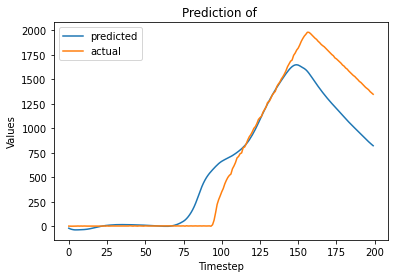

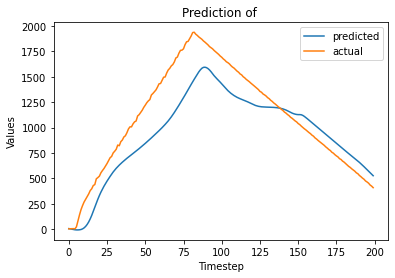

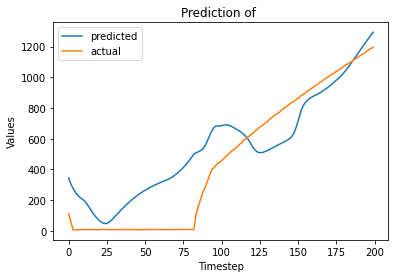

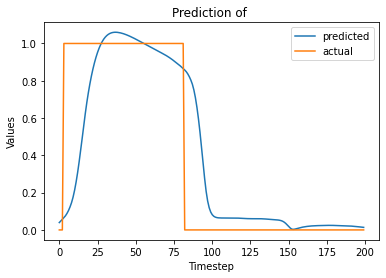

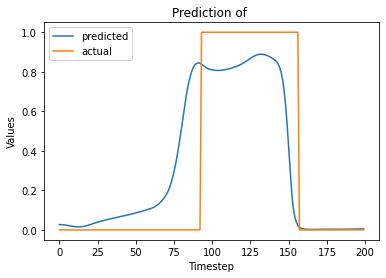

In [2]:
for i in range(5):
    title = "Prediction of "
    actual = raw_data[2030:2230,i]
    pred = inv_var.T
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("Values")
    plt.plot(pred[i], label="predicted")
    plt.plot(actual, label="actual")
    plt.legend()
    plt.show()

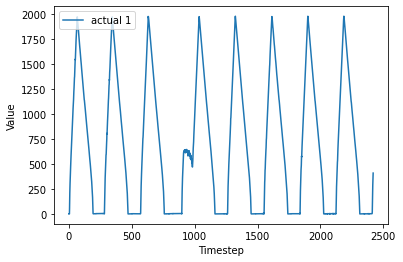

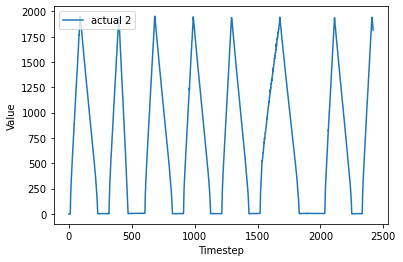

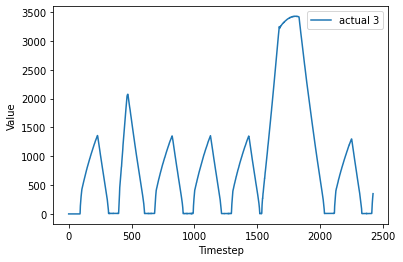

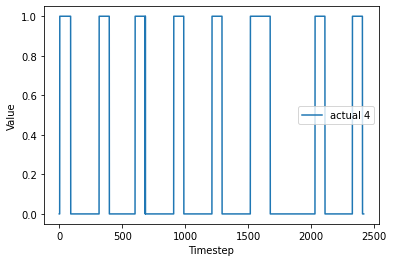

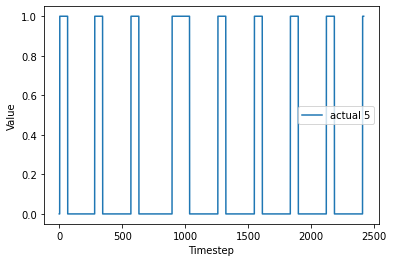

In [3]:
for i in range(5):
    labels = "actual "+str(i+1)
    actual = raw_data[:,i]
    plt.xlabel("Timestep")
    plt.ylabel("Value")
    plt.plot(actual, label=labels)
    plt.legend()
    plt.show()

Welcome
Welcome
Welcome
Welcome
Welcome


# Prediction of the signals individually (Each by a different model)

### Predicting the first signal

In [58]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack, vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence

# Read the data
data = read_csv('pollution2.csv', header=0, index_col=0)

# horizontally stack columns
raw_dat = data.values
raw_data = raw_dat[:,0:1]

n_train = 2000
#dataset = raw_data[0:n_train,:]
dataset = raw_data[0:n_train]
# choose a number of time steps
n_steps = 30
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.1))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)

# demonstrate iterative prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
x_inp = scaled_data[n_train:n_train+n_steps,:]
print(f'Initial shape of x_input {x_inp.shape}')
# x_inp = array([[70,75,145], [80,85,165], [90,95,185]])

var_1 = list()
# var_1, var_2, var_3, var_4, var_5 = list(), list(), list(), list(), list()
# num_repeat = 30
num_repeat = 10
for i in range(num_repeat):
  x_input = x_inp.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  # inv_yhat = scaler.inverse_transform(yhat)
  var_1.append(yhat[0][0])
#   var_2.append(yhat[0][1])
#   var_3.append(yhat[0][2])
#   var_4.append(yhat[0][3])
#   var_5.append(yhat[0][4])
#   # p = np.append(x_inp[0],yhat[0][0])[1:]
#   # q = np.append(x_inp[1],yhat[0][1])[1:]
#   # r = np.append(x_inp[2],yhat[0][2])[1:]
  print(f'Value of yhat {yhat}')
  
  x_inp = np.append(x_inp,yhat[0])
  x_inp = x_inp[1:]

# var = DataFrame(vstack((var_1,var_2,var_3,var_4,var_5))).T
# inv_var
yhat

Initial shape of x_input (30, 1)
Value of yhat [[3.1009178]]
Value of yhat [[3.5292225]]
Value of yhat [[4.94928]]
Value of yhat [[7.0735583]]
Value of yhat [[7.1849823]]
Value of yhat [[12.519163]]
Value of yhat [[11.30368]]
Value of yhat [[16.201145]]
Value of yhat [[9.529088]]
Value of yhat [[51.53095]]


array([[51.53095]], dtype=float32)

In [52]:
data = read_csv('pollution2.csv', header=0, index_col=0)

# horizontally stack columns
raw_dat = data.values
raw_data = raw_dat[:,0:1]
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data)
scaled_data
val = 

array([[0.12977867],
       [0.14889336],
       [0.15995976],
       ...,
       [0.01006036],
       [0.00804829],
       [0.01207243]])

## Prediction using a standard dataset (benchmark) to investigate the usefulness of the data

In [39]:
### I need a different dataset

### Prediction with the air pollution dataset

Epoch 1/100
625/625 - 18s - loss: 0.0103 - 18s/epoch - 28ms/step
Epoch 2/100
625/625 - 16s - loss: 0.0043 - 16s/epoch - 25ms/step
Epoch 3/100
625/625 - 16s - loss: 0.0030 - 16s/epoch - 25ms/step
Epoch 4/100
625/625 - 17s - loss: 0.0025 - 17s/epoch - 27ms/step
Epoch 5/100
625/625 - 17s - loss: 0.0021 - 17s/epoch - 27ms/step
Epoch 6/100
625/625 - 16s - loss: 0.0019 - 16s/epoch - 26ms/step
Epoch 7/100
625/625 - 17s - loss: 0.0017 - 17s/epoch - 26ms/step
Epoch 8/100
625/625 - 16s - loss: 0.0016 - 16s/epoch - 26ms/step
Epoch 9/100
625/625 - 16s - loss: 0.0015 - 16s/epoch - 26ms/step
Epoch 10/100
625/625 - 16s - loss: 0.0014 - 16s/epoch - 26ms/step
Epoch 11/100
625/625 - 17s - loss: 0.0014 - 17s/epoch - 26ms/step
Epoch 12/100
625/625 - 16s - loss: 0.0014 - 16s/epoch - 26ms/step
Epoch 13/100
625/625 - 16s - loss: 0.0013 - 16s/epoch - 26ms/step
Epoch 14/100
625/625 - 17s - loss: 0.0013 - 17s/epoch - 27ms/step
Epoch 15/100
625/625 - 17s - loss: 0.0013 - 17s/epoch - 27ms/step
Epoch 16/100
625/62

Value of yhat [[0.16272894 0.68872315 0.7145457  0.31165993 0.07651003]]
Value of yhat [[0.16744778 0.695681   0.70529854 0.30697244 0.0866909 ]]
Value of yhat [[0.17713073 0.70370656 0.6839869  0.3111294  0.09265399]]
Value of yhat [[0.19275707 0.70908314 0.6539026  0.32291    0.09548676]]
Value of yhat [[0.21539304 0.7111952  0.61955947 0.3389757  0.0945489 ]]
--------------AFTER THE INVERTED SCALING-------------------
-------Learning Curve--------


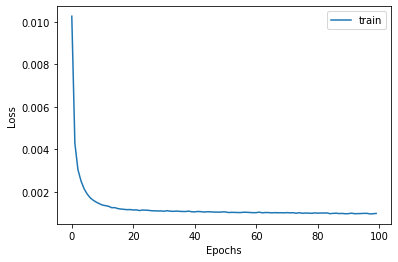

In [3]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack, vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence

# Read the data
data = read_csv('pollution2.csv', header=0, index_col=0)

# horizontally stack columns
raw_data = data.values
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data)

n_train = 20000
#dataset = raw_data[0:n_train,:]
dataset = scaled_data[0:n_train,:]
# choose a number of time steps
n_steps = 30
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(75, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.1))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
train_history = model.fit(X, y, epochs=100, verbose=2)

# demonstrate iterative prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
x_inp = scaled_data[n_train:n_train+n_steps,:]
print(f'Initial shape of x_input {x_inp.shape}')

result = []
var_1, var_2, var_3, var_4, var_5 = list(), list(), list(), list(), list()
# num_repeat = 30
num_repeat = 30
for i in range(num_repeat):
  x_input = x_inp.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  # inv_yhat = scaler.inverse_transform(yhat)
  var_1.append(yhat[0][0])
  var_2.append(yhat[0][1])
  var_3.append(yhat[0][2])
  var_4.append(yhat[0][3])
  var_5.append(yhat[0][4])
  # p = np.append(x_inp[0],yhat[0][0])[1:]
  # q = np.append(x_inp[1],yhat[0][1])[1:]
  # r = np.append(x_inp[2],yhat[0][2])[1:]
  print(f'Value of yhat {yhat}')
  result = np.append(result,yhat[0])
  x_inp = np.append(x_inp,yhat[0])
  x_inp = x_inp.reshape(1,n_steps+1,n_features)
  x_inp = x_inp[:,1:,0:]

var = DataFrame(vstack((var_1,var_2,var_3,var_4,var_5))).T
inv_var = scaler.inverse_transform(var)
print("--------------AFTER THE INVERTED SCALING-------------------")
inv_var

print("-------Learning Curve--------")
plt.plot(train_history.history['loss'], label='train')
# plt.plot(train_history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
water_data = read_csv('samples_data.csv', header=0, index_col=0)
water_data.describe()

,Tank_1,Tank_2,Tank_3,Pump_1,Pump_2
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,686.320661,714.946281,922.677686,0.300000,0.243802
std,654.955181,656.051613,942.572849,0.458352,0.429463
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,73.250000,0.000000,0.000000
50%,598.000000,639.500000,747.500000,0.000000,0.000000
75%,1244.000000,1293.250000,1226.250000,1.000000,0.000000
max,1980.000000,1952.000000,3427.000000,1.000000,1.000000


In [24]:
0.0675/0.458352

0.14726672950047126

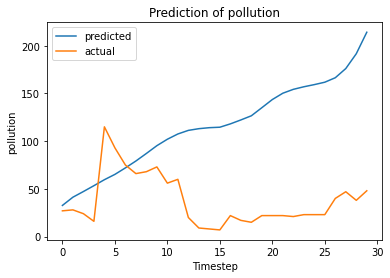

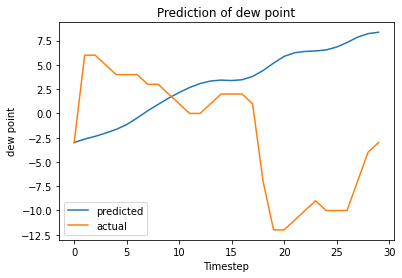

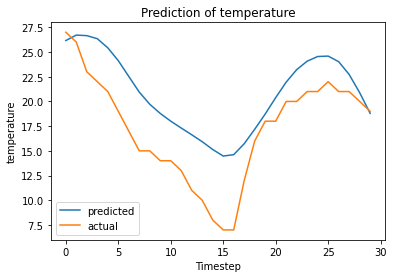

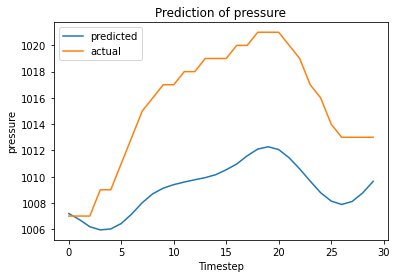

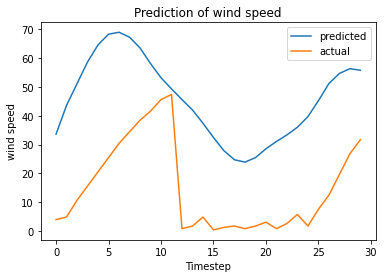

In [4]:
attr = ["pollution", "dew point", "temperature", "pressure", "wind speed"]
for i in range(5):
    title = "Prediction of "+str(attr[i])
    actual = raw_data[20030:20060,i]
    pred = inv_var.T
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
    plt.plot(pred[i], label="predicted")
    plt.plot(actual, label="actual")
    plt.legend()
    plt.show()

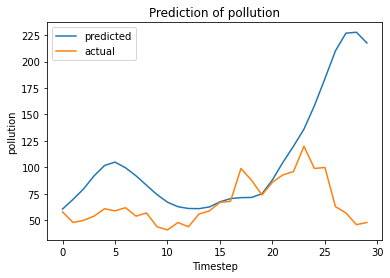

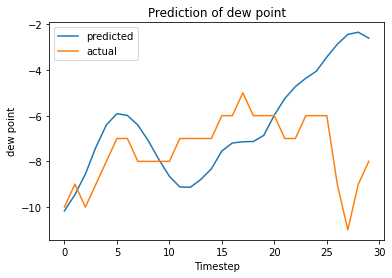

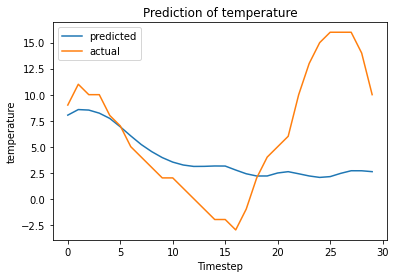

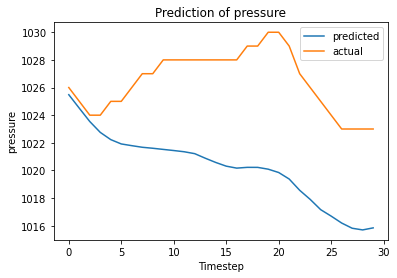

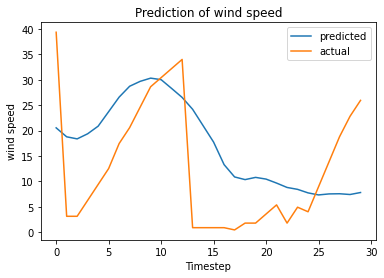

In [5]:
attr = ["pollution", "dew point", "temperature", "pressure", "wind speed"]
for i in range(5):
    title = "Prediction of "+str(attr[i])
    actual = raw_data[2030:2060,i]
    pred = inv_var.T
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
    plt.plot(pred[i], label="predicted")
    plt.plot(actual, label="actual")
    plt.legend()
    plt.show()